In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("classic")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/INSAID/main/Ecommerce%20Customers.csv")
df.shape

(500, 8)

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## EDA

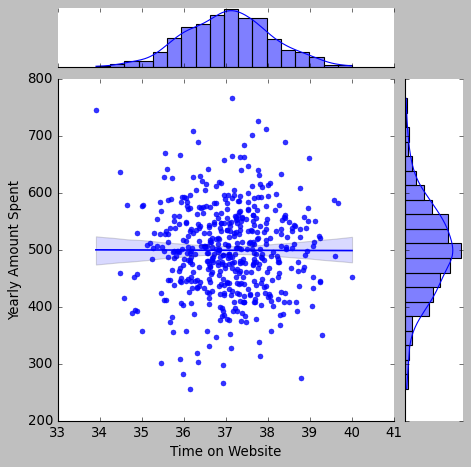

In [8]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, kind="reg")
plt.show()

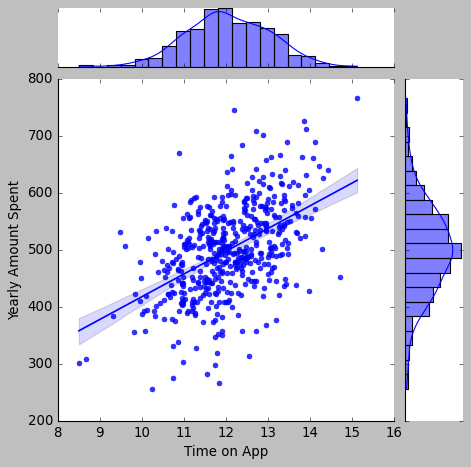

In [9]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df, kind="reg")
plt.show()

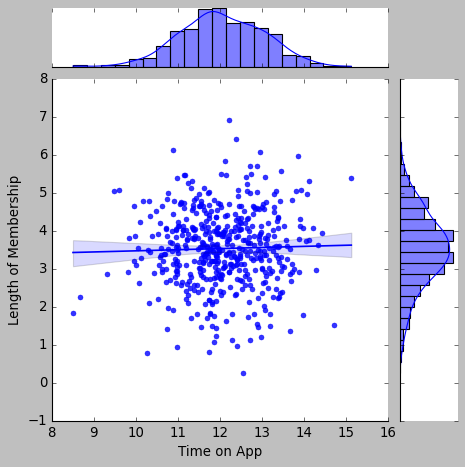

In [10]:
sns.jointplot(x="Time on App", y="Length of Membership", data=df, kind="reg")
plt.show()

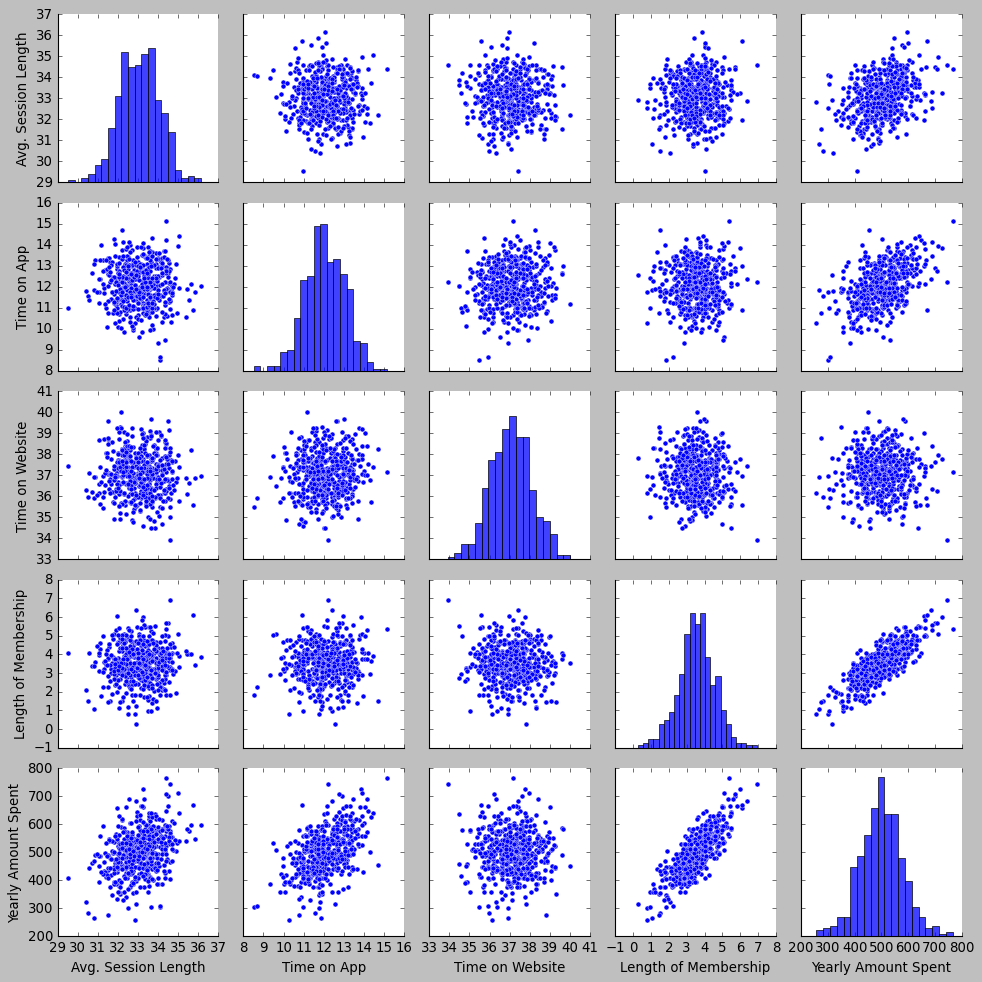

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [21]:
df.Avatar.value_counts()

CadetBlue        7
Cyan             7
SlateBlue        7
GreenYellow      7
Teal             7
                ..
Red              1
MediumPurple     1
PaleGoldenRod    1
Azure            1
LawnGreen        1
Name: Avatar, Length: 138, dtype: int64

In [22]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

y = df['Yearly Amount Spent']

In [23]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [24]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [25]:
X.shape, y.shape

((500, 4), (500,))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 4), (150, 4), (350,), (150,))

## Scaling

__Take Home Task__

# Model Training

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
lr

LinearRegression()

In [30]:
lr.coef_ # slopes

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [31]:
lr.intercept_

-1047.9327822502385

In [33]:
coeff_df = pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [34]:
y_pred = lr.predict(X_test)

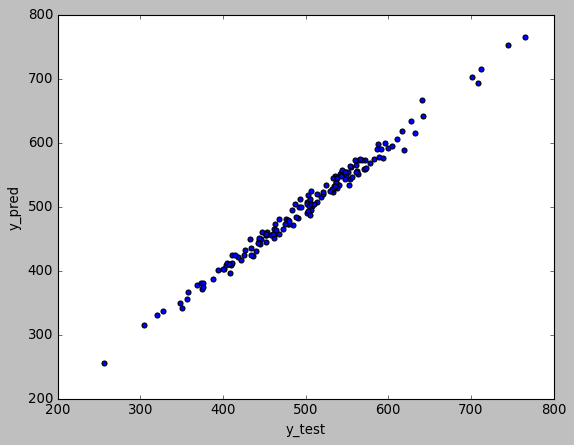

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [36]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
mean_absolute_error(y_test, y_pred)

7.22814865343086

In [38]:
mean_squared_error(y_test, y_pred)

79.81305165097483

In [39]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

8.933815066978655

In [40]:
r2_score(y_test, y_pred)

0.9890046246741233

## Residuals

The residuals must be normally distributed for a Linear Regression algorithm to work good.

In [42]:
res = y_test-y_pred
# We want the histogram of residuals to be normally distributed

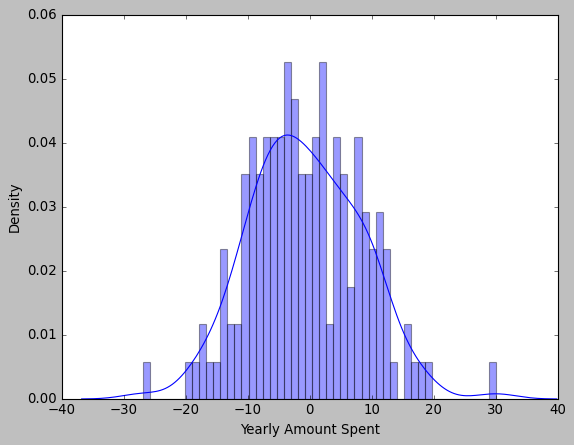

In [44]:
sns.distplot(res, bins=50)
plt.show()

## Happy Learning